# Time Series Analysis

## Data preprocessing




In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://raw.githubusercontent.com/blueberre/Applied-Forecasting/refs/heads/main/NYC_Central_Park_weather_1869-2022.csv'
df = pd.read_csv(url)

df.head()


,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,1869-01-01,0.75,9.0,NaN,19.0,29.0
1,1869-01-02,0.03,0.0,NaN,21.0,27.0
2,1869-01-03,0.00,0.0,NaN,27.0,35.0
3,1869-01-04,0.18,0.0,NaN,34.0,37.0
4,1869-01-05,0.05,0.0,NaN,37.0,43.0


In [ ]:
print(df.isnull().sum())


DATE        0
PRCP        0
SNOW      163
SNWD    16558
TMIN        7
TMAX        7
dtype: int64


For TMIN and TMAX (only 7 missing), we can use mean or median imputation.

For SNOW (163 missing), imputation with 0.

For SNWD (16,558 missing, mostly pre-1912), we may drop this column.

In [ ]:
# Impute missing temperature values with median
df['TMIN'].fillna(df['TMIN'].median(), inplace=True)
df['TMAX'].fillna(df['TMAX'].median(), inplace=True)

# Impute SNOW with 0 assuming no snowfall on those days
df['SNOW'].fillna(0, inplace=True)

df.drop('SNWD', axis=1, inplace=True)



<ipython-input-76-633bb4af9851>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TMIN'].fillna(df['TMIN'].median(), inplace=True)
<ipython-input-76-633bb4af9851>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

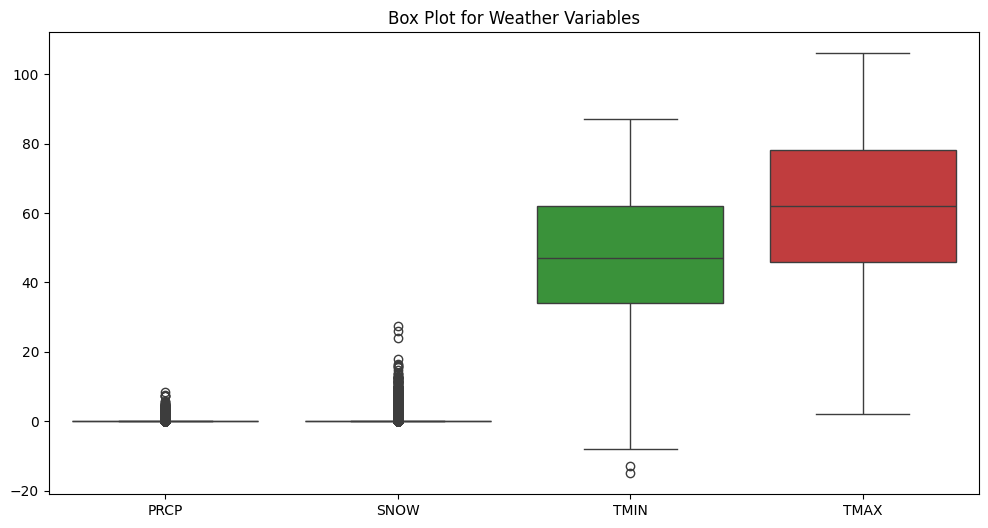

In [ ]:
#Detect and remove outliers using box plot

# Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PRCP', 'SNOW', 'TMIN', 'TMAX']])
plt.title('Box Plot for Weather Variables')
plt.show()


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['PRCP', 'SNOW', 'TMIN', 'TMAX']:
    df = remove_outliers(df, col)


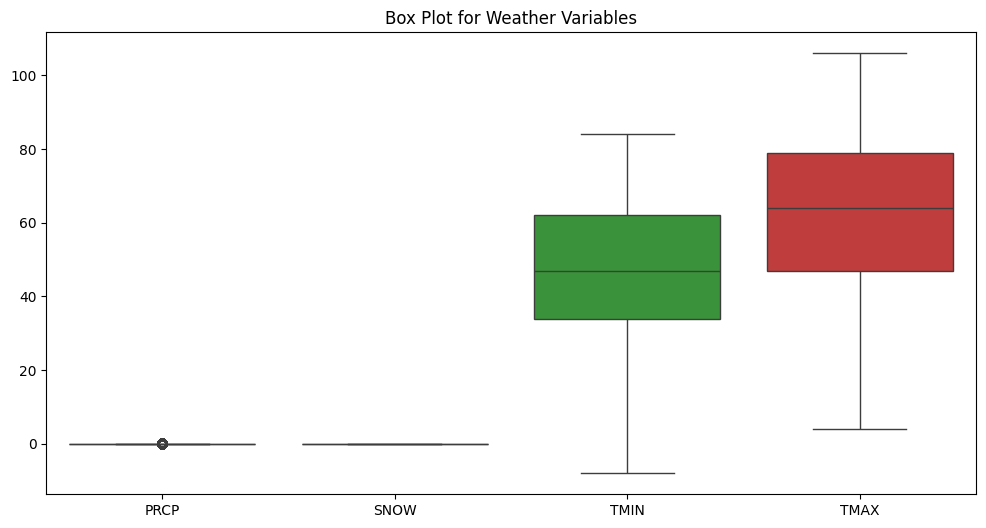

In [ ]:
# Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PRCP', 'SNOW', 'TMIN', 'TMAX']])
plt.title('Box Plot for Weather Variables')
plt.show()


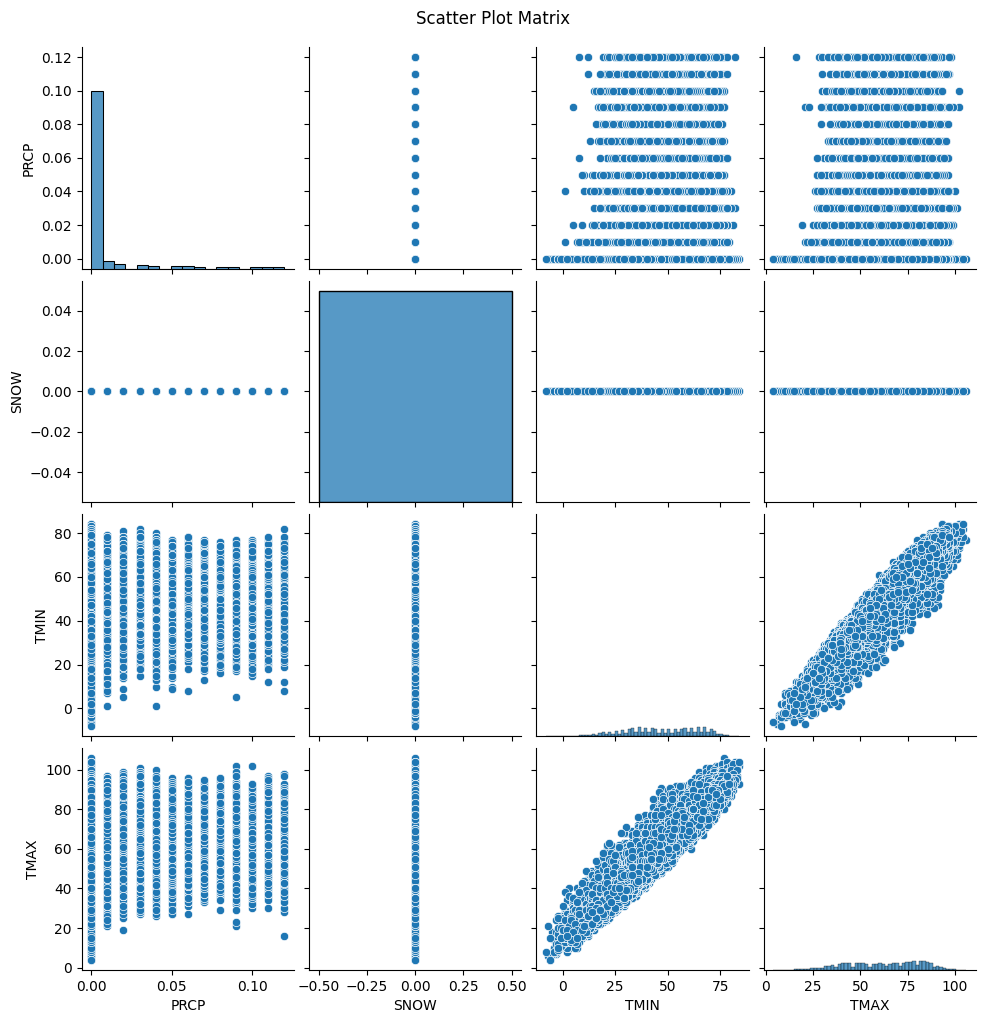

          PRCP  SNOW      TMIN      TMAX
PRCP  1.000000   NaN  0.068129  0.032848
SNOW       NaN   NaN       NaN       NaN
TMIN  0.068129   NaN  1.000000  0.959206
TMAX  0.032848   NaN  0.959206  1.000000


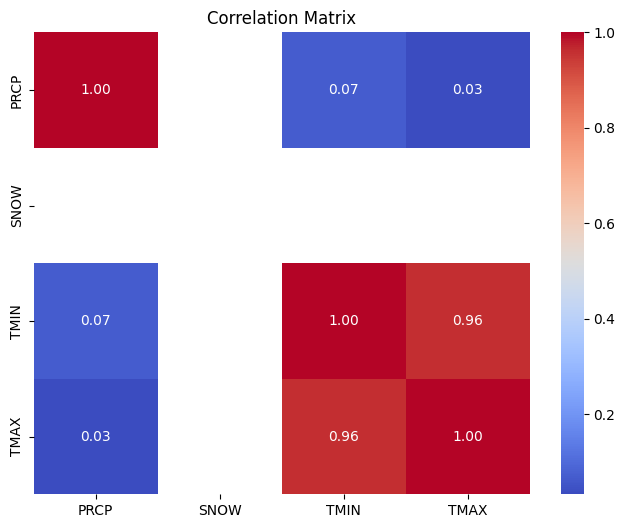

In [ ]:
# Plot scatter matrix
sns.pairplot(df[['PRCP', 'SNOW', 'TMIN', 'TMAX']])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

# Compute and display correlation
correlation = df[['PRCP', 'SNOW', 'TMIN', 'TMAX']].corr()
print(correlation)

# Heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


TMIN and TMAX have a very strong positive correlation (0.9592) - This makes sense because cold days have lower max temps

PRCP (precipitation) has a very weak correlation with temperatures.

Why SNOW has all NaNs:
When computing correlation, pandas excludes constant columns (all 0s or all the same), or columns with no overlapping data after outlier removal.

This likely means:

After removing outliers, the SNOW column is either:
Contains only zeros (or a single value), or doesn't align with the other variables after filtering.

In [ ]:
# Correlation before outlier removal

# Reload fresh data and impute again
df2 = pd.read_csv(url)
# Ensure DATE column is in datetime format
df2['DATE'] = pd.to_datetime(df2['DATE'])

# Set the DATE column as the index
df2.set_index('DATE', inplace=True)
df2['SNOW'].fillna(0, inplace=True)
df2['TMIN'].fillna(df2['TMIN'].median(), inplace=True)
df2['TMAX'].fillna(df2['TMAX'].median(), inplace=True)

# Drop SNWD only
df2.drop('SNWD', axis=1, inplace=True)

# Compute and display correlation
correlation = df2[['PRCP', 'SNOW', 'TMIN', 'TMAX']].corr()
print(correlation)


          PRCP      SNOW      TMIN      TMAX
PRCP  1.000000  0.166715  0.053288  0.000121
SNOW  0.166715  1.000000 -0.169831 -0.181494
TMIN  0.053288 -0.169831  1.000000  0.953845
TMAX  0.000121 -0.181494  0.953845  1.000000


<ipython-input-81-27d87aa5b675>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['SNOW'].fillna(0, inplace=True)
<ipython-input-81-27d87aa5b675>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

After removing outliers earlier, SNOW column became only zeros, so it lost all variance - that's why IT gave NaN in the correlation matrix.

This means:

Outlier removal should be cautious, especially for sparse/rare events like snow.

Consider outlier removal only for temperature columns when modeling snow or PRCP.

## Temperature Forecasting

Load and Prepare the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'https://raw.githubusercontent.com/blueberre/Applied-Forecasting/refs/heads/main/NYC_Central_Park_weather_1869-2022.csv'
df = pd.read_csv(url)

# Parse date
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Fill missing values
df['TMIN'].fillna(df['TMIN'].median(), inplace=True)
df['TMAX'].fillna(df['TMAX'].median(), inplace=True)
df['SNOW'].fillna(0, inplace=True)

# Drop SNWD
df.drop(columns=['SNWD'], inplace=True)

# Add TEMP = average daily temp
df['TEMP'] = (df['TMIN'] + df['TMAX']) / 2

# Display first few rows
df[['TEMP']].head()


<ipython-input-1-ede492ba1c86>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TMIN'].fillna(df['TMIN'].median(), inplace=True)
<ipython-input-1-ede492ba1c86>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,TEMP
DATE,
1869-01-01,24.0
1869-01-02,24.0
1869-01-03,31.0
1869-01-04,35.5
1869-01-05,40.0


Plot the time series

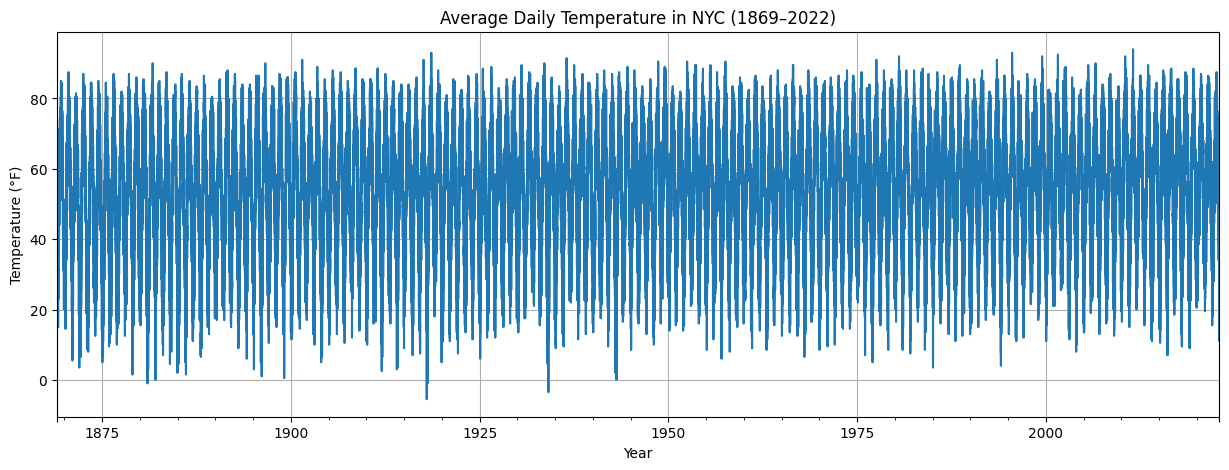

In [ ]:
plt.figure(figsize=(15, 5))
df['TEMP'].plot(title='Average Daily Temperature in NYC (1869–2022)')
plt.ylabel('Temperature (°F)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


The plot shows very strong cyclical patterns: sharp, repeating rises and falls in temperature every year.

These sharp fluctuations are due to the natural seasonal climate cycle (hot summers, cold winters).

Slight increase in the upper bounds in recent years suggests a possible long-term warming trend.

**Seasonality:** Very clear and consistent yearly seasonality. Every year, temperatures rise and fall in a predictable wave pattern.

**Trend:** There's some indication of a slight upward trend in temperature over the century (possible climate change impact), though it's less visually dominant due to the scale of seasonal variation.

**Checking for Stationarity (ADF Test)**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['TEMP'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -26.771843878064434
p-value: 0.0


The dataset is stationary.

A p-value < 0.05 indicates we can reject the null hypothesis (that the series has a unit root, i.e., is non-stationary).

Since p-value is essentially zero, we reject the null and conclude that the temperature series is already stationary (no differencing required).

**Identifying Random Walk Behavior**

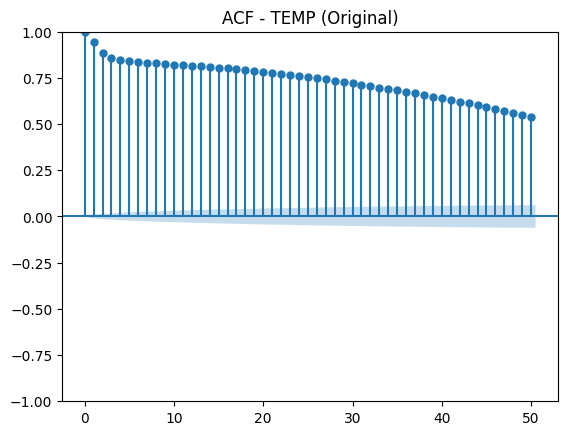

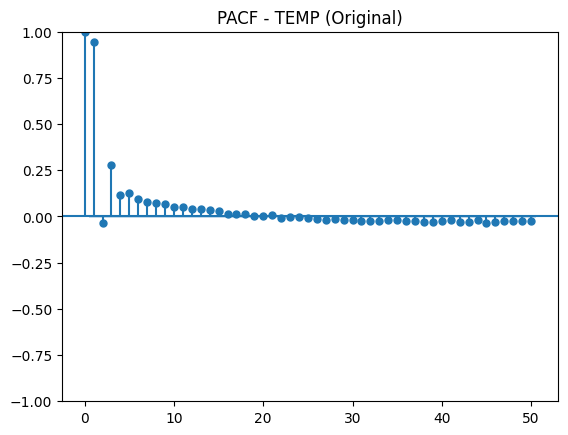

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# For original TEMP
plot_acf(df['TEMP'].dropna(), lags=50)
plt.title("ACF - TEMP (Original)")
plt.show()

plot_pacf(df['TEMP'].dropna(), lags=50)
plt.title("PACF - TEMP (Original)")
plt.show()



**ACF:**

Shows strong, slowly decaying autocorrelations at seasonal lags.

This is consistent with the strong seasonality observed in temperature data.

**PACF**:

Shows significant spikes at low lags (1–2).

Suggests that temperature depends on values from the past few days and also has a longer-term pattern, likely yearly seasonality.

Conclusion: Strong seasonality and non-stationarity.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


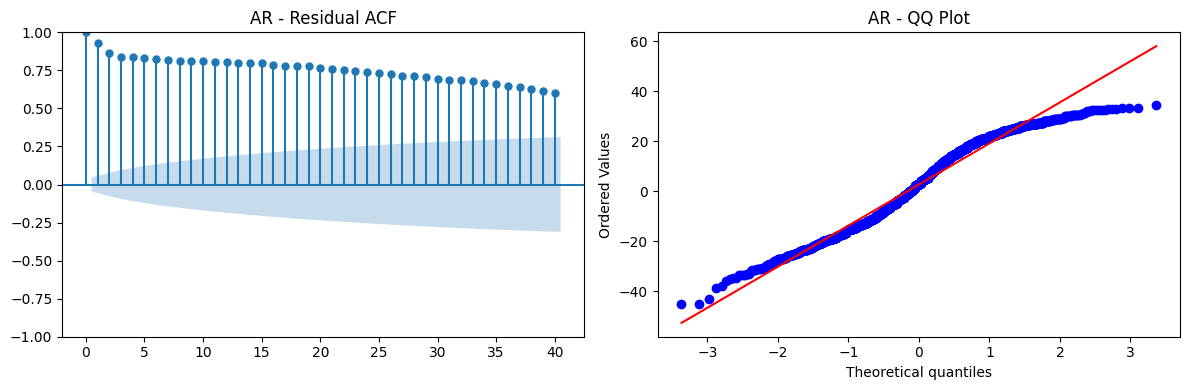

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


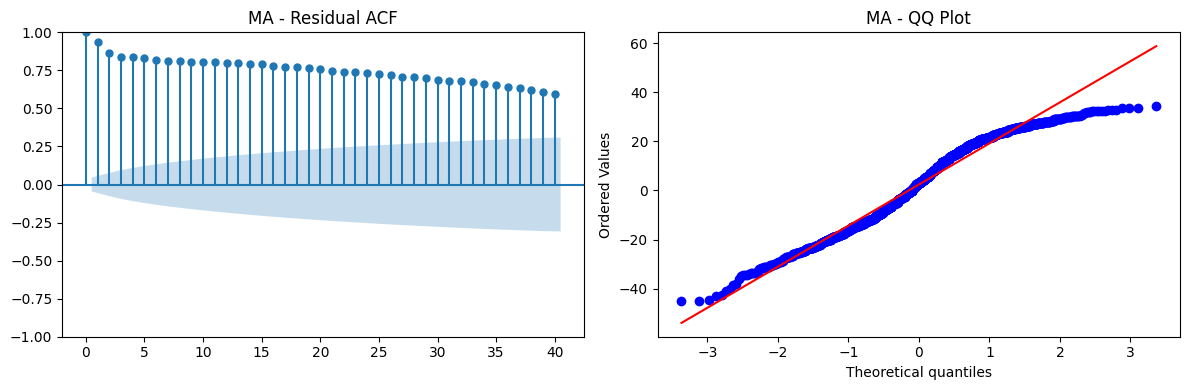

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

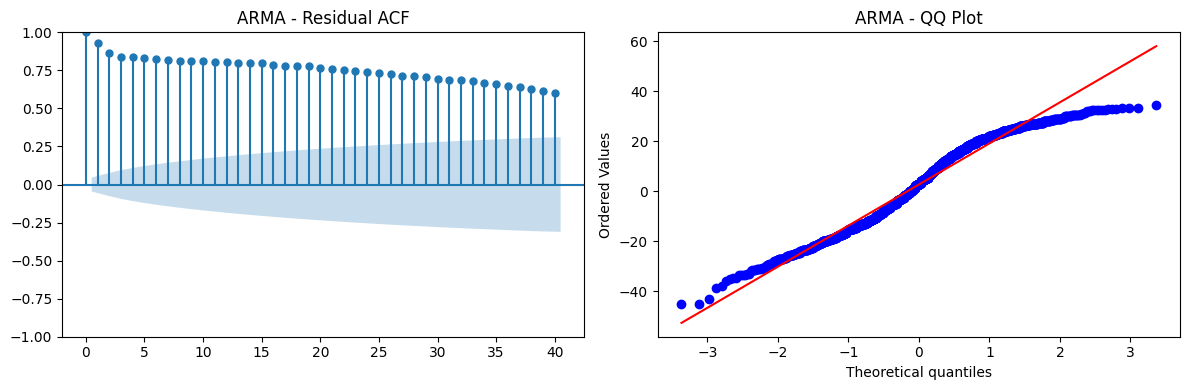

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


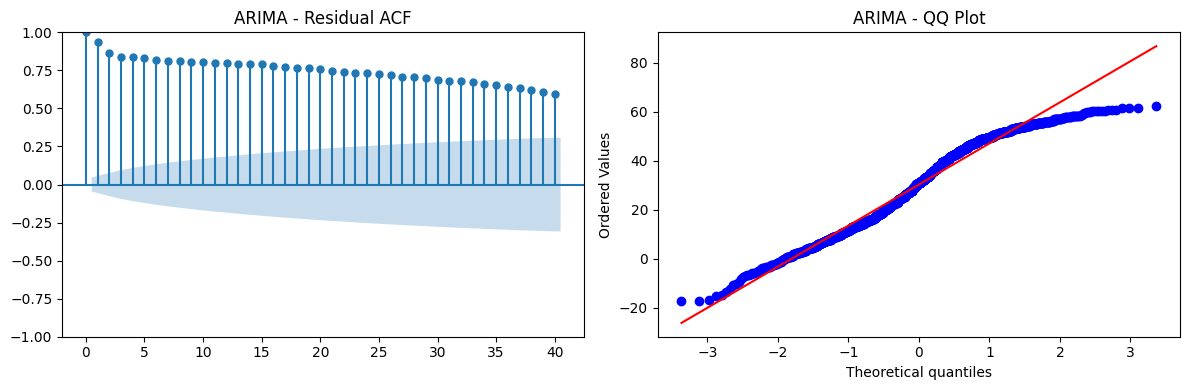

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Train-test split (last 5 years as test)
train = df['TEMP'][:-5*365]
test = df['TEMP'][-5*365:]

# Helper function for residual analysis
def residual_analysis(residuals, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ACF plot
    plot_acf(residuals, ax=axes[0], lags=40)
    axes[0].set_title(f"{model_name} - Residual ACF")

    # QQ Plot
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title(f"{model_name} - QQ Plot")

    plt.tight_layout()
    plt.show()

# Store model results
results = {}

# Step 2: Fit models

## AR Model
model_ar = ARIMA(train, order=(2, 0, 0)).fit()
forecast_ar = model_ar.forecast(steps=len(test))
residual_analysis(test - forecast_ar, "AR")
results['AR'] = {
    "MSE": mean_squared_error(test, forecast_ar),
    "MAE": mean_absolute_error(test, forecast_ar)
}

## MA Model
model_ma = ARIMA(train, order=(0, 0, 1)).fit()
forecast_ma = model_ma.forecast(steps=len(test))
residual_analysis(test - forecast_ma, "MA")
results['MA'] = {
    "MSE": mean_squared_error(test, forecast_ma),
    "MAE": mean_absolute_error(test, forecast_ma)
}

## ARMA Model
model_arma = ARIMA(train, order=(2, 0, 1)).fit()
forecast_arma = model_arma.forecast(steps=len(test))
residual_analysis(test - forecast_arma, "ARMA")
results['ARMA'] = {
    "MSE": mean_squared_error(test, forecast_arma),
    "MAE": mean_absolute_error(test, forecast_arma)
}

## ARIMA Model
model_arima = ARIMA(train, order=(2, 1, 1)).fit()
forecast_arima = model_arima.forecast(steps=len(test))
residual_analysis(test - forecast_arima, "ARIMA")
results['ARIMA'] = {
    "MSE": mean_squared_error(test, forecast_arima),
    "MAE": mean_absolute_error(test, forecast_arima)
}




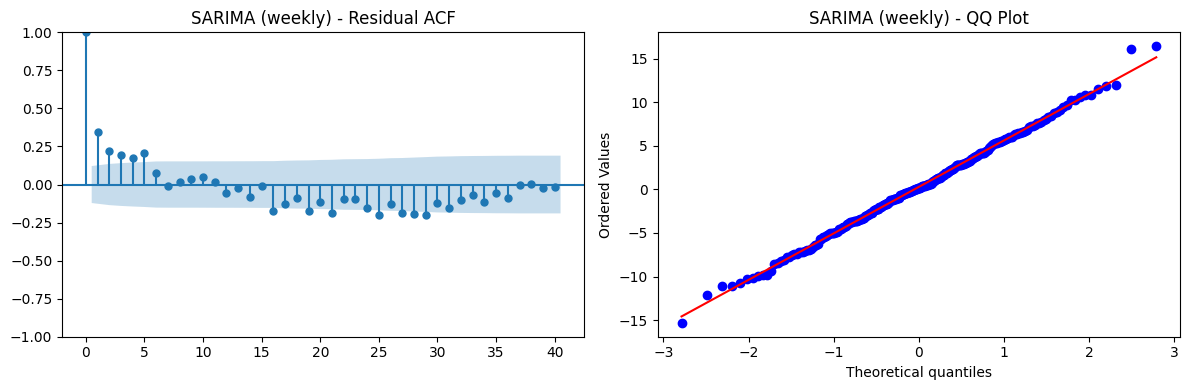

In [ ]:
df_weekly = df['TEMP'].resample('W').mean()

train_week = df_weekly[:-260]  # ~5 years test
test_week = df_weekly[-260:]

# SARIMA with seasonal period of 52 (weeks in a year)
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima_week = SARIMAX(train_week, order=(2,1,1), seasonal_order=(1,1,1,52)).fit(disp=False)
forecast_week = model_sarima_week.forecast(steps=len(test_week))

# Residual analysis
residual_analysis(test_week - forecast_week, "SARIMA (weekly)")
results['SARIMA_weekly'] = {
    "MSE": mean_squared_error(test_week, forecast_week),
    "MAE": mean_absolute_error(test_week, forecast_week)
}


**Results**

In [ ]:
# Display comparison table
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='MSE'))


                       MSE        MAE
SARIMA_weekly    28.074315   4.179334
AR              285.265564  14.557207
ARMA            285.588990  14.567978
MA              294.491797  14.792416
ARIMA          1205.678976  30.578920


# Deep Learning Implementations

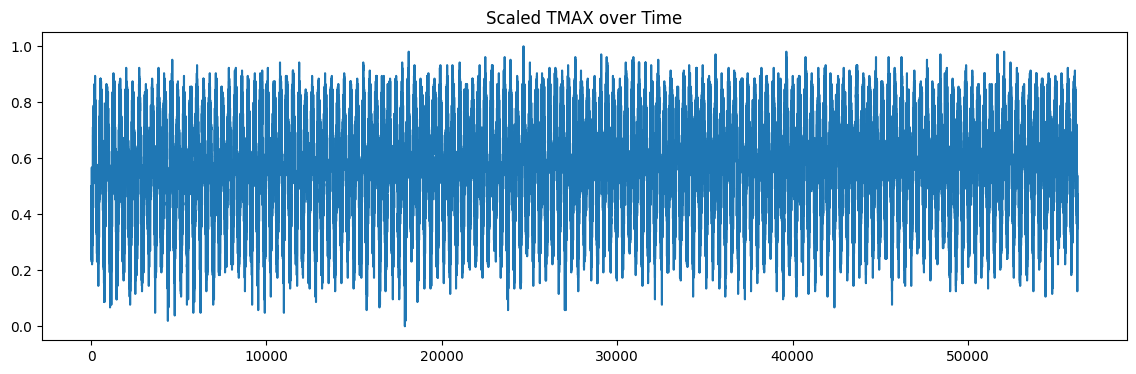

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalize for deep learning
scaler = MinMaxScaler()
df['TMAX_scaled'] = scaler.fit_transform(df[['TMAX']])

# Plot the scaled data
df['TMAX_scaled'].plot(figsize=(14, 4), title='Scaled TMAX over Time')
plt.show()

now do windowing, i.e., convert the TMAX_scaled time series into sequences suitable for RNN/LSTM/GRU input.

Create Windowed Sequences
We’ll define:

window_size: how many past days to use as input

forecast_horizon: how far ahead we want to predict (we’ll start with 1-day ahead)

In [ ]:
window_size = 30         # use last 30 days
forecast_horizon = 1     # predict next day

Convert Time Series to Supervised Format

In [ ]:
def create_sequences(series, window_size, forecast_horizon):
    X = []
    y = []
    for i in range(len(series) - window_size - forecast_horizon + 1):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size + forecast_horizon - 1])
    return np.array(X), np.array(y)

# Use the scaled TMAX series
series = df['TMAX_scaled'].values

# Create sequences
window_size = 30
forecast_horizon = 1

X, y = create_sequences(series, window_size, forecast_horizon)

print(f"Input shape: {X.shape}")   # Should be (num_samples, 30)
print(f"Output shape: {y.shape}")  # Should be (num_samples,)


Input shape: (56215, 30)
Output shape: (56215,)


Train-Validation-Test Split

In [ ]:
split_1 = int(len(X) * 0.7)
split_2 = int(len(X) * 0.9)

X_train, y_train = X[:split_1], y[:split_1]
X_val, y_val = X[split_1:split_2], y[split_1:split_2]
X_test, y_test = X[split_2:], y[split_2:]

# Reshape for RNN: (samples, time_steps, features)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"X_train shape: {X_train.shape}")  # (n, 30, 1)


X_train shape: (39350, 30, 1)


# vanilla RNN

Build & Train RNN Model (using Keras)
We'll use a simple architecture:

1 RNN layer (e.g. SimpleRNN)

1 Dense output layer

Loss: MSE

Optimizer: Adam

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the model
rnn_model = Sequential([
    SimpleRNN(units=32, input_shape=(window_size, 1), return_sequences=False),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1230/1230 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0097 - mae: 0.0715 - val_loss: 0.0052 - val_mae: 0.0557
Epoch 2/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0049 - mae: 0.0548 - val_loss: 0.0048 - val_mae: 0.0535
Epoch 3/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0050 - mae: 0.0551 - val_loss: 0.0046 - val_mae: 0.0528
Epoch 4/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0048 - mae: 0.0544 - val_loss: 0.0046 - val_mae: 0.0529
Epoch 5/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0049 - mae: 0.0549 - val_loss: 0.0048 - val_mae: 0.0544
Epoch 6/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0048 - mae: 0.0543 - val_loss: 0.0054 - val_mae: 0.0582
Epoch 7/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0048 - mae: 0.0545 - val_loss: 0.0046 - val_mae: 0.0532
Epoch 8/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0048 - mae: 0.0546 - val_loss: 0.0047 - val_mae: 0.0531
Epoch 9/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 8s 7m

Plot Training History

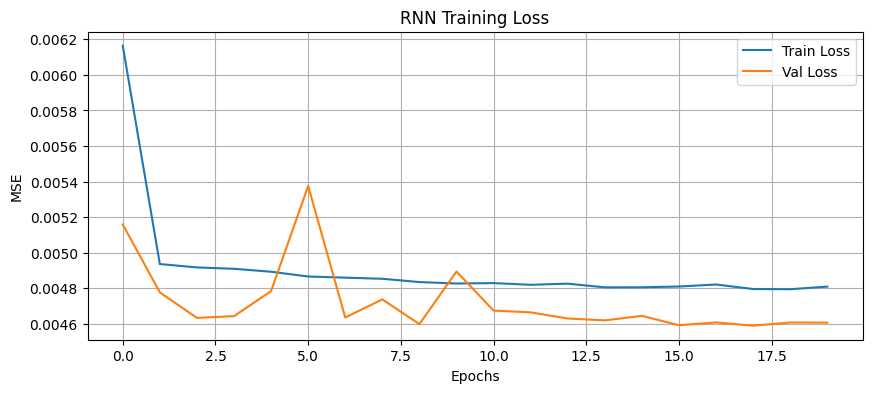

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history,model_name):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{model_name} Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history,"RNN")


Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = rnn_model.predict(X_test).flatten()

# Inverse transform to original scale
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Metrics
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

print(f"Test MSE: {mse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test R²: {r2:.3f}")


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test MSE: 48.321
Test MAE: 5.394
Test R²: 0.852


 Plot Predictions vs Actua

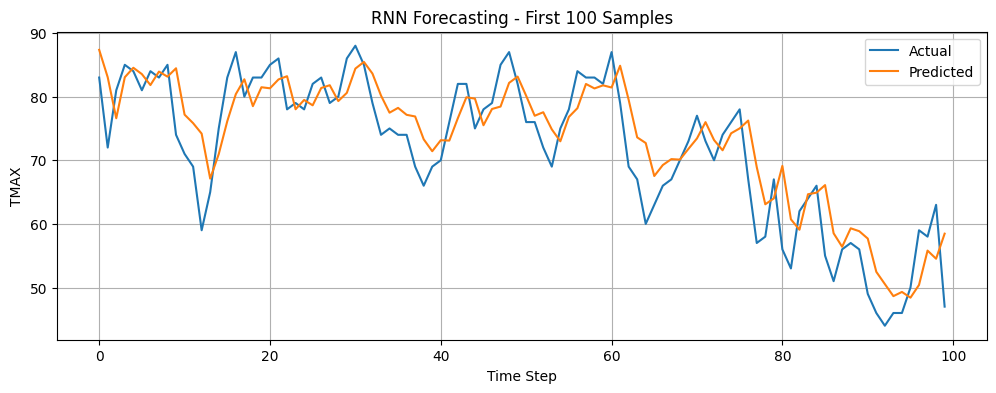

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_unscaled[:100], label='Actual')
plt.plot(y_pred_unscaled[:100], label='Predicted')
plt.title('RNN Forecasting - First 100 Samples')
plt.xlabel('Time Step')
plt.ylabel('TMAX')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import itertools

# Hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.0, 0.2],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'epochs': [30]
}

# Prepare grid
grid = list(itertools.product(*param_grid.values()))

# Placeholder for results
results = []

# Build model function
def build_rnn(units, dropout, learning_rate):
    model = Sequential([
        SimpleRNN(units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
        Dropout(dropout),
        Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Tuning loop
for values in grid:
    params = dict(zip(param_grid.keys(), values))
    print(f"Training with: {params}")

    model = build_rnn(params['units'], params['dropout'], params['learning_rate'])

    history = model.fit(X_train, y_train,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        validation_data=(X_val, y_val),
                        verbose=0)

    val_pred = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

    results.append({
        'params': params,
        'val_rmse': val_rmse,
        'final_val_loss': history.history['val_loss'][-1]
    })

# Sort and show best
results = sorted(results, key=lambda x: x['val_rmse'])
best_model_config = results[0]
print("Best Config:", best_model_config)


Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Best Config: {'params': {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}, 'val_rmse': np.float64(0.06761831464095266), 'final_val_loss': 0.004572237376123667}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: assuming your original results list is named `results`
results = [
    {'params': {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}, 'val_rmse': 0.067618, 'final_val_loss': 0.004572},
    {'params': {'units': 128, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}, 'val_rmse': 0.067690, 'final_val_loss': 0.004582},
    {'params': {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}, 'val_rmse': 0.067743, 'final_val_loss': 0.004589},
    {'params': {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}, 'val_rmse': 0.067748, 'final_val_loss': 0.004590},
    {'params': {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}, 'val_rmse': 0.067750, 'final_val_loss': 0.004590}
]

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Expand 'params' dictionary into individual columns
df_params = df_results['params'].apply(pd.Series)

# Combine with other columns
df_combined = pd.concat([df_results.drop(columns=['params']), df_params], axis=1)


In [ ]:
best = df_combined.loc[df_combined['val_rmse'].idxmin()]
print("Best Config:")
print(best)


Best Config:
val_rmse           0.067618
final_val_loss     0.004572
units             64.000000
dropout            0.200000
learning_rate      0.001000
batch_size        32.000000
epochs            30.000000
Name: 0, dtype: float64


In [ ]:
best_params = best.to_dict()
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'val_rmse': 0.067618, 'final_val_loss': 0.004572, 'units': 64.0, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32.0, 'epochs': 30.0}


In [ ]:
best_params = {
    'units': int(best['units']),
    'dropout': float(best['dropout']),
    'learning_rate': float(best['learning_rate']),
    'batch_size': int(best['batch_size']),
    'epochs': int(best['epochs'])
}


In [ ]:
# Rebuild model with best parameters
best_model = build_rnn(
    units=best_params['units'],
    dropout=best_params['dropout'],
    learning_rate=best_params['learning_rate']
)

# Combine train and val
X_train_full = np.concatenate([X_train, X_val])
y_train_full = np.concatenate([y_train, y_val])

# Train model
history = best_model.fit(
    X_train_full, y_train_full,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)


Epoch 1/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0280
Epoch 2/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0065
Epoch 3/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0058
Epoch 4/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0055
Epoch 5/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0053
Epoch 6/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0051
Epoch 7/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0051
Epoch 8/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0050
Epoch 9/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0050
Epoch 10/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0049
Epoch 11/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0050
Epoch 12/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0049
Epoch 13/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0050
Epoch 14/30
1582/1582 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0050
Epoch 15/30
158

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


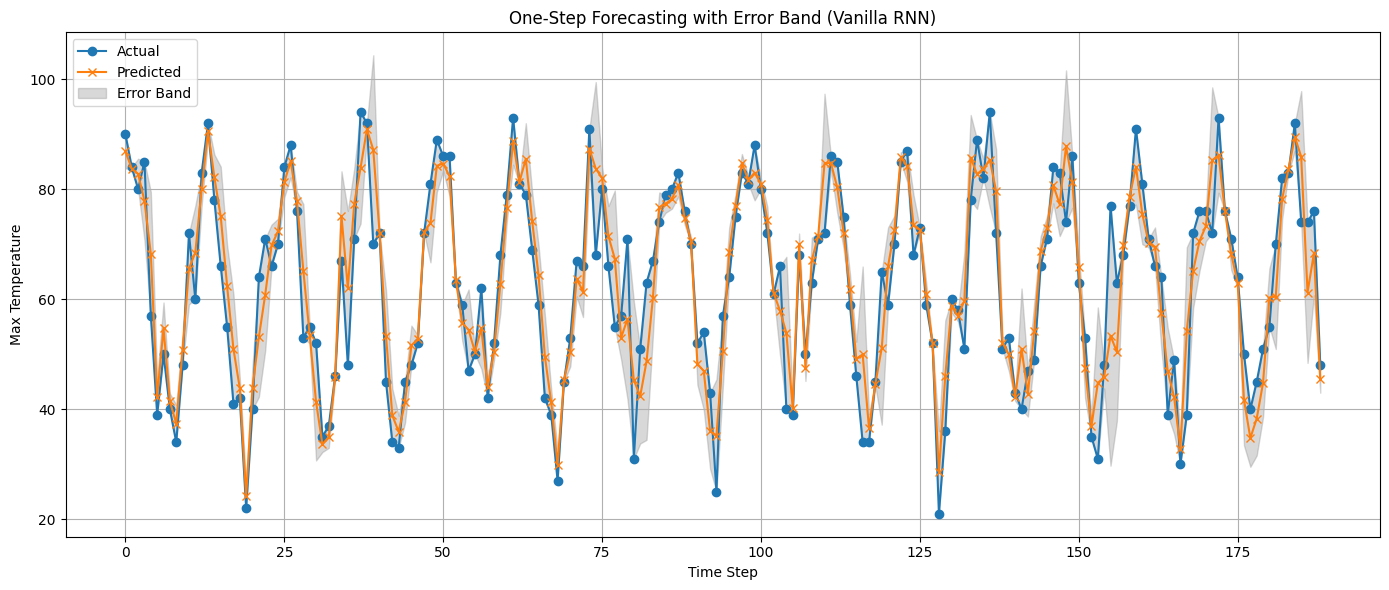

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = best_model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Compute absolute error
error = np.abs(y_test_inv - y_pred_inv)

# Plot actual vs predicted with error bands
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual', marker='o')
plt.plot(y_pred_inv, label='Predicted', marker='x')
plt.fill_between(range(len(y_test_inv)),
                 (y_pred_inv - error).flatten(),
                 (y_pred_inv + error).flatten(),
                 color='gray', alpha=0.3, label='Error Band')

plt.title('One-Step Forecasting with Error Band (Vanilla RNN)')
plt.xlabel('Time Step')
plt.ylabel('Max Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


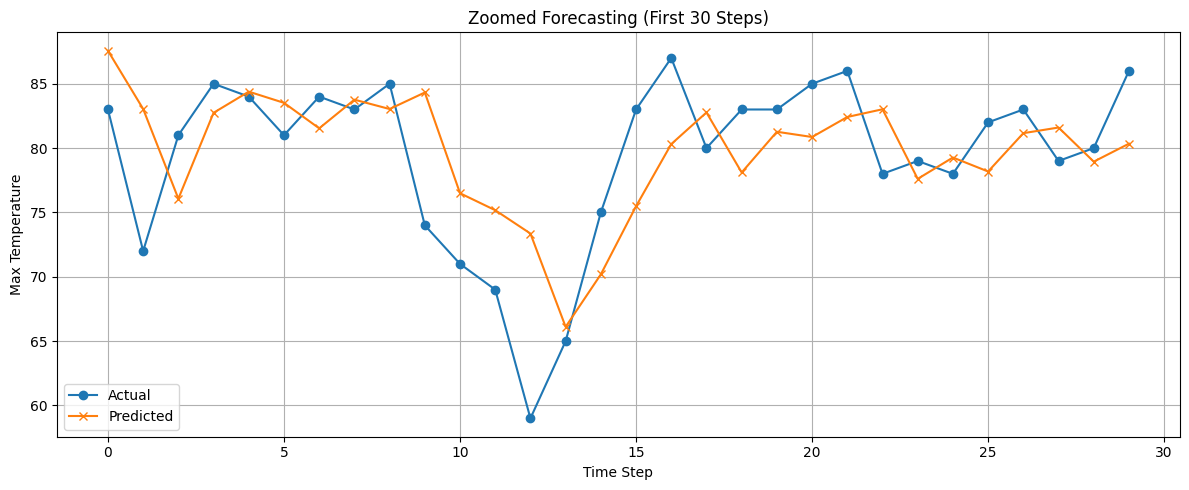

In [ ]:
# Set the number of time steps to zoom in
zoom_steps = 30  # you can change this to 10, 15, etc.

plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:zoom_steps], label='Actual', marker='o')
plt.plot(y_pred_inv[:zoom_steps], label='Predicted', marker='x')
plt.title(f'Zoomed Forecasting (First {zoom_steps} Steps)')
plt.xlabel('Time Step')
plt.ylabel('Max Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


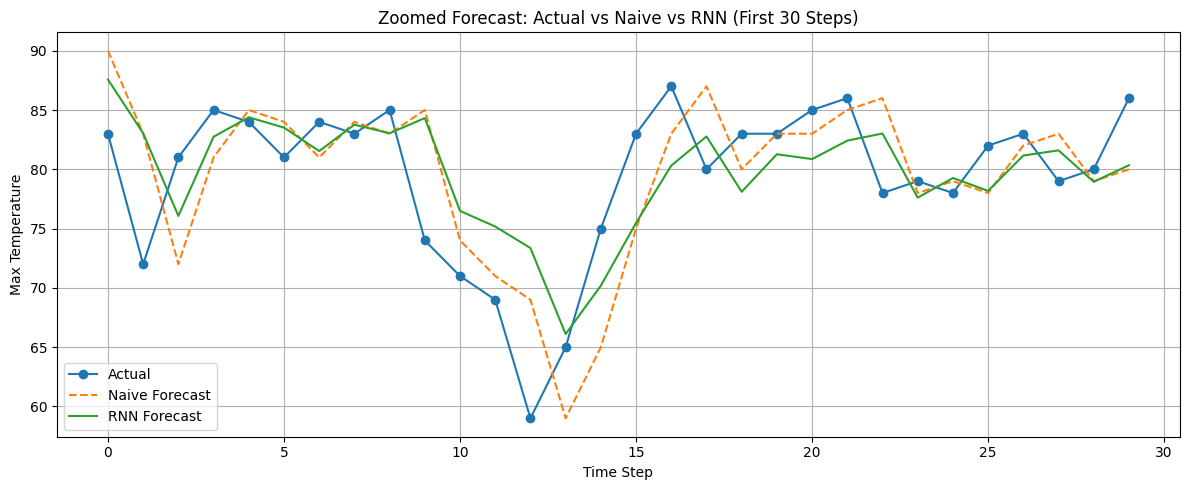

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv[:zoom_steps], label='Actual', marker='o')
plt.plot(naive_forecast_inv[:zoom_steps], label='Naive Forecast', linestyle='--')
plt.plot(y_pred_inv[:zoom_steps], label='RNN Forecast', linestyle='-')
plt.title(f'Zoomed Forecast: Actual vs Naive vs RNN (First {zoom_steps} Steps)')
plt.xlabel('Time Step')
plt.ylabel('Max Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **non overlapping windows**

In [ ]:
def create_non_overlapping_sequences(data, window_size):
    X, y = [], []
    for i in range(0, len(data) - window_size, window_size):  # step = window_size
        x_i = data[i:i + window_size]
        y_i = data[i + window_size]  # next point after window
        if len(x_i) == window_size:
            X.append(x_i)
            y.append(y_i)
    return np.array(X), np.array(y)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['TMAX']].values)

# Create non-overlapping sequences
window_size = 30  # 30 days = 1 month
X_seq, y_seq = create_non_overlapping_sequences(scaled_data, window_size)

# Reshape for RNN input
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

# Split chronologically (e.g., 70-20-10%)
train_size = int(0.7 * len(X_seq))
val_size = int(0.2 * len(X_seq))

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:train_size + val_size], y_seq[train_size:train_size + val_size]
X_test, y_test = X_seq[train_size + val_size:], y_seq[train_size + val_size:]


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1957 - val_loss: 0.0118
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0314 - val_loss: 0.0090
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0223 - val_loss: 0.0084
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0168 - val_loss: 0.0072
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0148 - val_loss: 0.0072
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129 - val_loss: 0.0071
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0139 - val_loss: 0.0068
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - val_loss: 0.0079
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - val_loss: 0.0066
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0113 - val_loss: 0.0063
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108 - val_loss: 0.0063
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099 - val_l

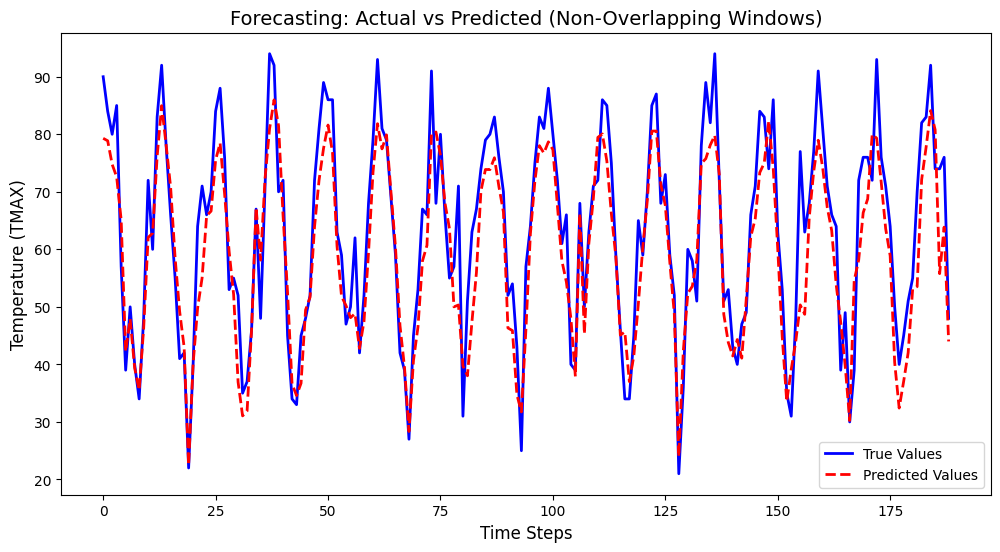

In [ ]:
# Build model using best parameters (from previous tuning)
best_params = {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001}  # Example best params
model = build_rnn(best_params['units'], best_params['dropout'], best_params['learning_rate'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
test_pred = model.predict(X_test)

# Inverse transform the predicted and true values
test_pred_rescaled = scaler.inverse_transform(test_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting actual vs predicted for test set
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='True Values', color='blue', linestyle='-', linewidth=2)
plt.plot(test_pred_rescaled, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Forecasting: Actual vs Predicted (Non-Overlapping Windows)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.show()


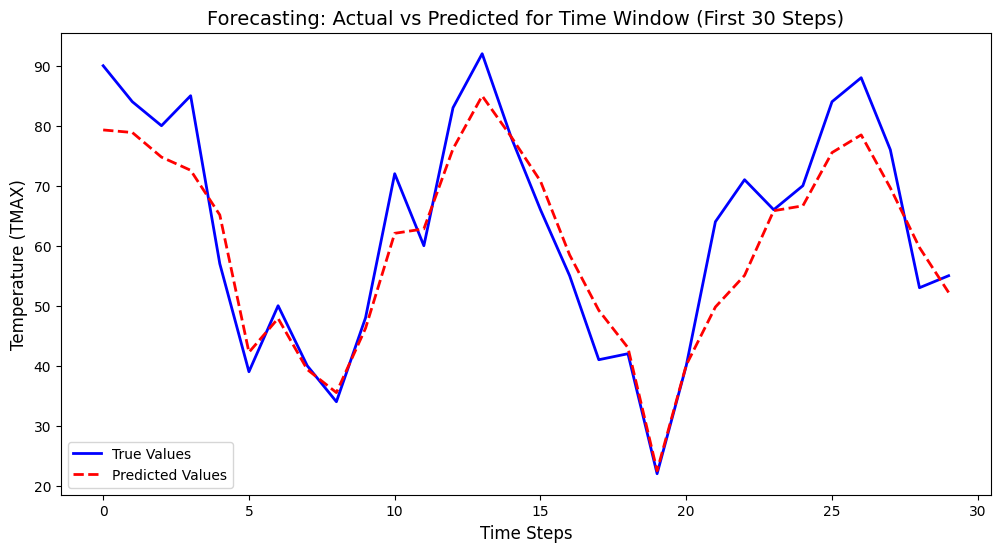

In [ ]:
# Let's consider a smaller window of 50 time steps from the test set for visualization

window_size = 30  # Select the first 50 data points for visualization
test_pred_window = test_pred_rescaled[:window_size]
y_test_window = y_test_rescaled[:window_size]

# Plotting actual vs predicted for the smaller time window
plt.figure(figsize=(12, 6))
plt.plot(y_test_window, label='True Values', color='blue', linestyle='-', linewidth=2)
plt.plot(test_pred_window, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title(f'Forecasting: Actual vs Predicted for Time Window (First {window_size} Steps)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate MSE, RMSE, MAE, and R-squared for the test set
mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, test_pred_rescaled)
r2 = r2_score(y_test_rescaled, test_pred_rescaled)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 60.7405
Root Mean Squared Error (RMSE): 7.7936
Mean Absolute Error (MAE): 6.3596
R-squared (R²): 0.8043


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import itertools
import pandas as pd

# Step 1: Prepare data using non-overlapping window
def create_non_overlapping_sequences(data, window_size):
    X, y = [], []
    for i in range(0, len(data) - window_size, window_size):  # step size = window_size
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Assuming you have a DataFrame `df` with a 'TMAX' column
temps = df['TMAX'].values  # extract the temperature series

# Normalize
scaler = MinMaxScaler()
temps_scaled = scaler.fit_transform(temps.reshape(-1, 1)).flatten()

# Now you can continue with window creation

# Create sequences
window_size = 30
X, y = create_non_overlapping_sequences(temps_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # RNN expects 3D input

# Split into train/val/test (70/20/10)
n = len(X)
train_size = int(n * 0.7)
val_size = int(n * 0.2)
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Step 2: Define model builder
def build_rnn(units, dropout, learning_rate):
    model = Sequential([
        SimpleRNN(units, input_shape=(X_train.shape[1], 1)),
        Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mse')
    return model

# Step 3: Define parameter grid
param_grid = {
    'units': [32, 64],
    'dropout': [0.0, 0.2],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'epochs': [30]
}

# Step 4: Tuning Loop
grid = list(itertools.product(*param_grid.values()))
results = []

for values in grid:
    params = dict(zip(param_grid.keys(), values))
    print(f"Training with: {params}")
    model = build_rnn(params['units'], params['dropout'], params['learning_rate'])

    history = model.fit(X_train, y_train,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        validation_data=(X_val, y_val),
                        verbose=0)

    val_pred = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

    results.append({
        'params': params,
        'val_rmse': val_rmse,
        'final_val_loss': history.history['val_loss'][-1]
    })

# Step 5: Show best configuration
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_rmse')
best_params = results_df.iloc[0]['params']
print("Best Parameters:", best_params)


Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Best Parameters: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.2854 - val_loss: 0.0297
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0370 - val_loss: 0.0221
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - val_loss: 0.0163
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0237 - val_loss: 0.0127
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0189 - val_loss: 0.0098
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - val_loss: 0.0094
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183 - val_loss: 0.0115
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - val_loss: 0.0087
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - val_loss: 0.0078
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - val_loss: 0.0076
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - val_loss: 0.0073
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - val_l

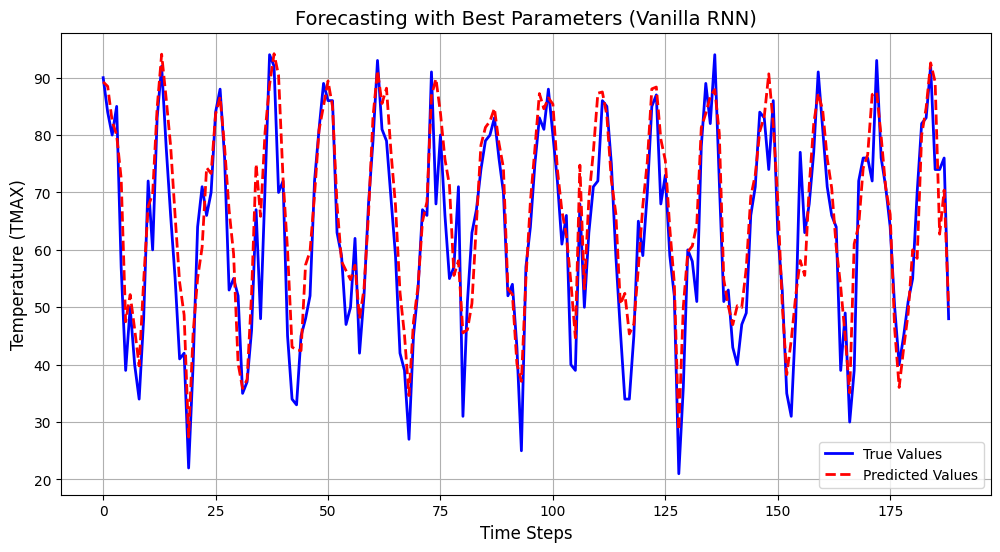

In [ ]:
# Best Parameters
best_params = {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32}

# Rebuild the model using best hyperparameters
model = build_rnn(
    units=best_params['units'],
    dropout=best_params['dropout'],
    learning_rate=best_params['learning_rate']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=best_params['batch_size'],
    validation_data=(X_val, y_val),
    verbose=1
)

# Forecast on test set
test_pred = model.predict(X_test)

# Inverse transform
test_pred_rescaled = scaler.inverse_transform(test_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='True Values', color='blue', linewidth=2)
plt.plot(test_pred_rescaled, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Forecasting with Best Parameters (Vanilla RNN)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


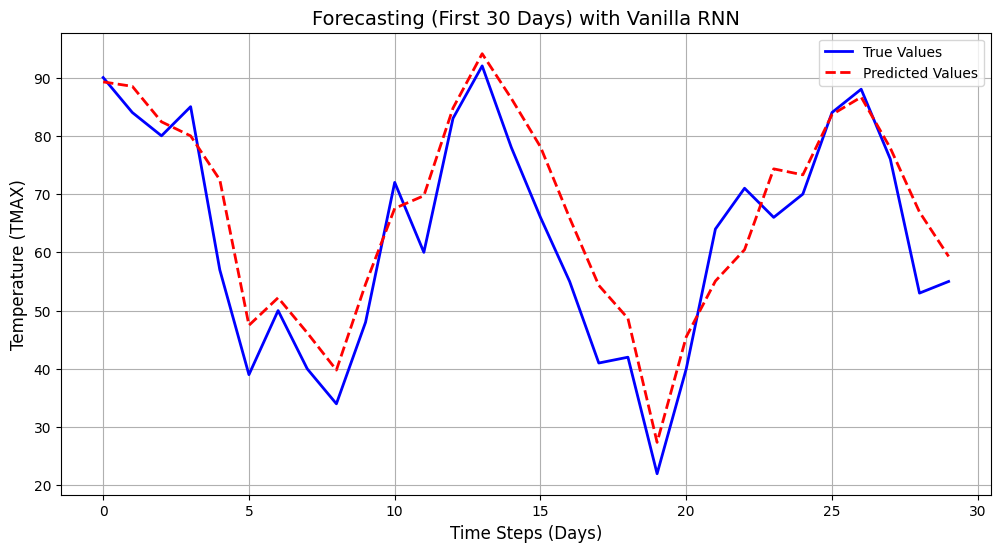

In [ ]:
# Plot only the first 30 test points
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled[:30], label='True Values', color='blue', linewidth=2)
plt.plot(test_pred_rescaled[:30], label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Forecasting (First 30 Days) with Vanilla RNN', fontsize=14)
plt.xlabel('Time Steps (Days)', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluation Metrics
mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, test_pred_rescaled)
r2 = r2_score(y_test_rescaled, test_pred_rescaled)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 44.8287
Root Mean Squared Error (RMSE): 6.6954
Mean Absolute Error (MAE): 5.2055
R-squared (R²): 0.8555


# LSTM

Build & Train LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
lstm_model = Sequential([
    LSTM(units=64, input_shape=(window_size, 1), return_sequences=False),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1230/1230 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 0.0182 - mae: 0.0873 - val_loss: 0.0051 - val_mae: 0.0559
Epoch 2/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0051 - mae: 0.0559 - val_loss: 0.0046 - val_mae: 0.0527
Epoch 3/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 0.0048 - mae: 0.0543 - val_loss: 0.0046 - val_mae: 0.0529
Epoch 4/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 0.0048 - mae: 0.0544 - val_loss: 0.0047 - val_mae: 0.0536
Epoch 5/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0049 - mae: 0.0548 - val_loss: 0.0048 - val_mae: 0.0535
Epoch 6/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0048 - mae: 0.0536 - val_loss: 0.0046 - val_mae: 0.0527
Epoch 7/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0048 - mae: 0.0537 - val_loss: 0.0047 - val_mae: 0.0541
Epoch 8/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0048 - mae: 0.0539 - val_loss: 0.0046 - val_mae: 0.0525
Epoch 9/20
1230/1230 ━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, test_pred_rescaled))
print(f'RMSE on Test Data: {rmse}')


RMSE on Test Data: 7.79362084493335


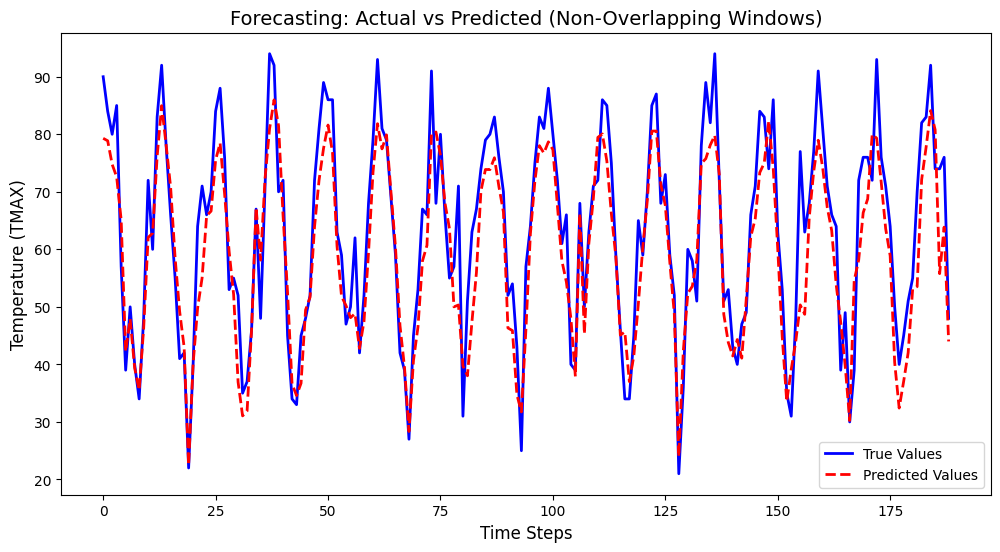

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='True Values', color='blue', linestyle='-', linewidth=2)
plt.plot(test_pred_rescaled, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Forecasting: Actual vs Predicted (Non-Overlapping Windows)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.show()

Plot LSTM Loss

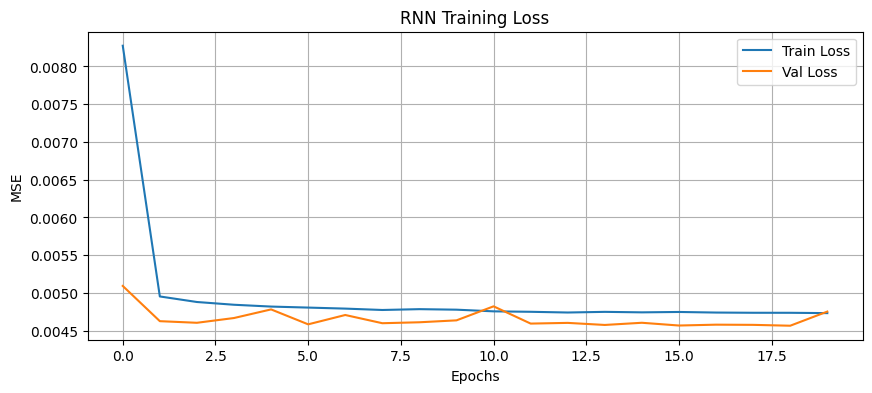

In [ ]:
plot_loss(lstm_history)


Evaluate LSTM Model

In [ ]:
# Predict on test data
y_lstm_pred = lstm_model.predict(X_test).flatten()

# Inverse transform
y_lstm_pred_unscaled = scaler.inverse_transform(y_lstm_pred.reshape(-1, 1)).flatten()

# Metrics
mse_lstm = mean_squared_error(y_test_unscaled, y_lstm_pred_unscaled)
mae_lstm = mean_absolute_error(y_test_unscaled, y_lstm_pred_unscaled)
r2_lstm = r2_score(y_test_unscaled, y_lstm_pred_unscaled)

print(f"LSTM Test MSE: {mse_lstm:.3f}")
print(f"LSTM Test MAE: {mae_lstm:.3f}")
print(f"LSTM Test R²: {r2_lstm:.3f}")


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM Test MSE: 49.693
LSTM Test MAE: 5.460
LSTM Test R²: 0.848


Compare Actual vs Predicted (LSTM)

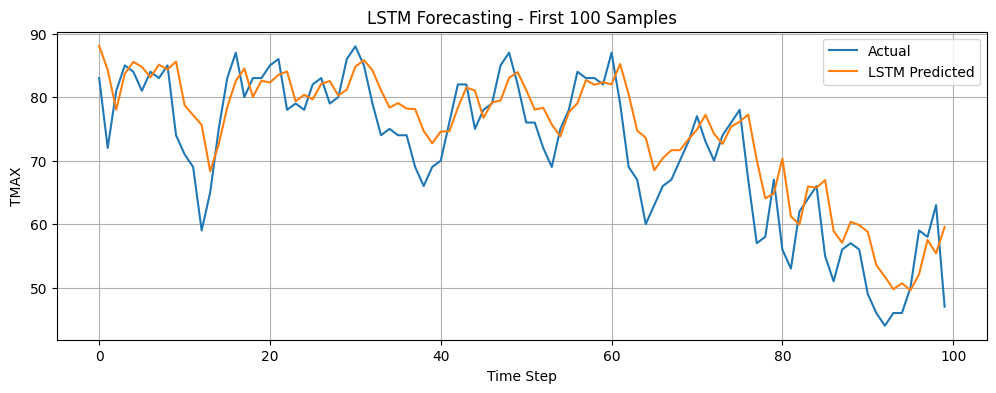

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_unscaled[:100], label='Actual')
plt.plot(y_lstm_pred_unscaled[:100], label='LSTM Predicted')
plt.title('LSTM Forecasting - First 100 Samples')
plt.xlabel('Time Step')
plt.ylabel('TMAX')
plt.legend()
plt.grid(True)
plt.show()


hyper parameter tuning for LSTM

Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Training with: {'units': 128, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Training with: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Best Config: {'params': {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}, 'val_rmse': np.float64(0.07360414606359589), 'final_val_loss': 0.0054175700061023235}
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1256 - val_loss: 0.0127
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0066 - val_l

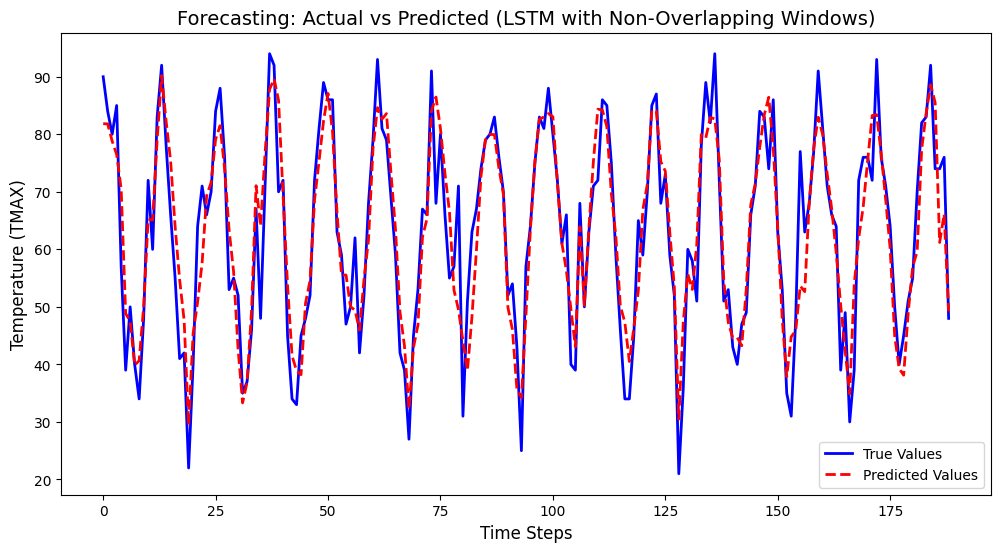

In [ ]:
import itertools
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.0, 0.2],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'epochs': [30]
}

# Prepare grid
grid = list(itertools.product(*param_grid.values()))

# Placeholder for results
results = []

# Build LSTM model function
def build_lstm(units, dropout, learning_rate):
    model = Sequential([
        LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
        Dropout(dropout),
        Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Tuning loop
for values in grid:
    params = dict(zip(param_grid.keys(), values))
    print(f"Training with: {params}")

    model = build_lstm(params['units'], params['dropout'], params['learning_rate'])

    # Train model
    history = model.fit(X_train, y_train,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        validation_data=(X_val, y_val),
                        verbose=0)

    # Evaluate validation RMSE
    val_pred = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

    results.append({
        'params': params,
        'val_rmse': val_rmse,
        'final_val_loss': history.history['val_loss'][-1]
    })

# Sort and show best
results = sorted(results, key=lambda x: x['val_rmse'])
best_model_config = results[0]
print("Best Config:", best_model_config)

# Now you can use the best parameters to build the final model and forecast
best_params = best_model_config['params']

# Rebuild the model with best parameters
best_lstm_model = build_lstm(best_params['units'], best_params['dropout'], best_params['learning_rate'])

# Train final model
history = best_lstm_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val, y_val), verbose=1)

# Evaluate on the test set
test_pred = best_lstm_model.predict(X_test)

# Inverse transform the predicted and true values
test_pred_rescaled = scaler.inverse_transform(test_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting Actual vs Predicted for Test Set
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='True Values', color='blue', linestyle='-', linewidth=2)
plt.plot(test_pred_rescaled, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Forecasting: Actual vs Predicted (LSTM with Non-Overlapping Windows)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.show()



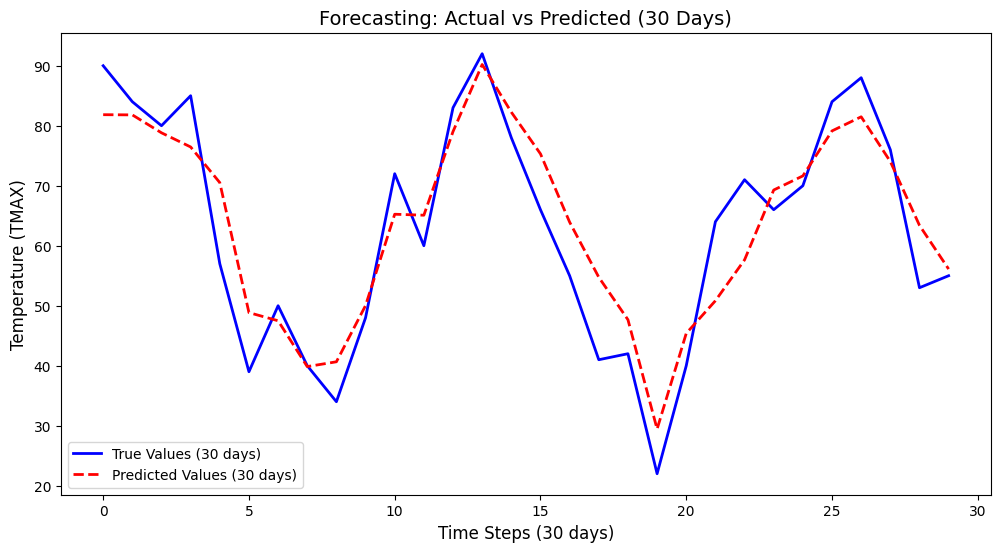

In [ ]:
# Assuming the predictions and true values are already rescaled and available
# Slice the data to include only the first 30 days
y_test_30_days = y_test_rescaled[:30]
test_pred_30_days = test_pred_rescaled[:30]

plt.figure(figsize=(12, 6))
plt.plot(y_test_30_days, label='True Values (30 days)', color='blue', linestyle='-', linewidth=2)
plt.plot(test_pred_30_days, label='Predicted Values (30 days)', color='red', linestyle='--', linewidth=2)
plt.title('Forecasting: Actual vs Predicted (30 Days)', fontsize=14)
plt.xlabel('Time Steps (30 days)', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Calculate the evaluation metrics for the entire dataset
mae = mean_absolute_error(y_test_rescaled, test_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, test_pred_rescaled)

# Print the evaluation metrics
print("Evaluation Metrics (Entire Test Set):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Evaluation Metrics (Entire Test Set):
Mean Absolute Error (MAE): 5.5505
Mean Squared Error (MSE): 50.8684
Root Mean Squared Error (RMSE): 7.1322
R² Score: 0.8361


In [ ]:
import pandas as pd

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame([
    {
        'Units': r['params']['units'],
        'Dropout': r['params']['dropout'],
        'Learning Rate': r['params']['learning_rate'],
        'Batch Size': r['params']['batch_size'],
        'Epochs': r['params']['epochs'],
        'Val RMSE': r['val_rmse'],
        'Final Val Loss': r['final_val_loss']
    } for r in results
])

# Sort by Val RMSE
results_df_sorted = results_df.sort_values(by='Val RMSE').reset_index(drop=True)

# Display all configurations
pd.set_option('display.max_rows', None)  # Show all rows in output
print("All LSTM Hyperparameter Tuning Results:")
print(results_df_sorted)


All LSTM Hyperparameter Tuning Results:
    Units  Dropout  Learning Rate  Batch Size  Epochs  Val RMSE  \
0      32      0.0         0.0010          32      30  0.073604   
1     128      0.0         0.0010          32      30  0.073617   
2      64      0.0         0.0010          32      30  0.074216   
3      64      0.2         0.0010          32      30  0.075906   
4     128      0.2         0.0010          32      30  0.076018   
5      32      0.0         0.0010          64      30  0.077147   
6     128      0.0         0.0005          32      30  0.077432   
7      32      0.2         0.0010          32      30  0.077608   
8     128      0.2         0.0005          32      30  0.078088   
9      64      0.2         0.0005          32      30  0.078094   
10    128      0.2         0.0010          64      30  0.078128   
11     32      0.2         0.0005          32      30  0.080035   
12     32      0.0         0.0005          32      30  0.080319   
13    128      0.0    

# GRU

Build & Train GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

# Build GRU model
gru_model = Sequential([
    GRU(units=64, input_shape=(window_size, 1), return_sequences=False),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1230/1230 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - loss: 0.0200 - mae: 0.0877 - val_loss: 0.0047 - val_mae: 0.0535
Epoch 2/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 0.0050 - mae: 0.0552 - val_loss: 0.0046 - val_mae: 0.0529
Epoch 3/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 0.0048 - mae: 0.0542 - val_loss: 0.0048 - val_mae: 0.0533
Epoch 4/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 0.0048 - mae: 0.0543 - val_loss: 0.0046 - val_mae: 0.0532
Epoch 5/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - loss: 0.0049 - mae: 0.0548 - val_loss: 0.0047 - val_mae: 0.0540
Epoch 6/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - loss: 0.0049 - mae: 0.0549 - val_loss: 0.0049 - val_mae: 0.0548
Epoch 7/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 0.0048 - mae: 0.0542 - val_loss: 0.0047 - val_mae: 0.0530
Epoch 8/20
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - loss: 0.0049 - mae: 0.0545 - val_loss: 0.0046 - val_mae: 0.0527
Epoch 9/20
1230/1230 ━━━━━━━━━━━━━━

Plot GRU Loss

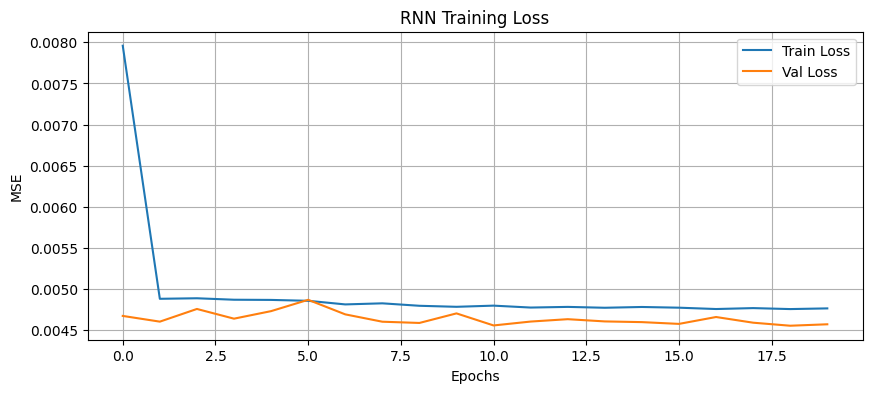

In [ ]:
plot_loss(gru_history)


Evaluate GRU Model

In [ ]:
# Predict on test data
y_gru_pred = gru_model.predict(X_test).flatten()

# Inverse transform
y_gru_pred_unscaled = scaler.inverse_transform(y_gru_pred.reshape(-1, 1)).flatten()

# Metrics
mse_gru = mean_squared_error(y_test_unscaled, y_gru_pred_unscaled)
mae_gru = mean_absolute_error(y_test_unscaled, y_gru_pred_unscaled)
r2_gru = r2_score(y_test_unscaled, y_gru_pred_unscaled)

print(f"GRU Test MSE: {mse_gru:.3f}")
print(f"GRU Test MAE: {mae_gru:.3f}")
print(f"GRU Test R²: {r2_gru:.3f}")


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
GRU Test MSE: 47.479
GRU Test MAE: 5.359
GRU Test R²: 0.855


Compare Actual vs Predicted (GRU)

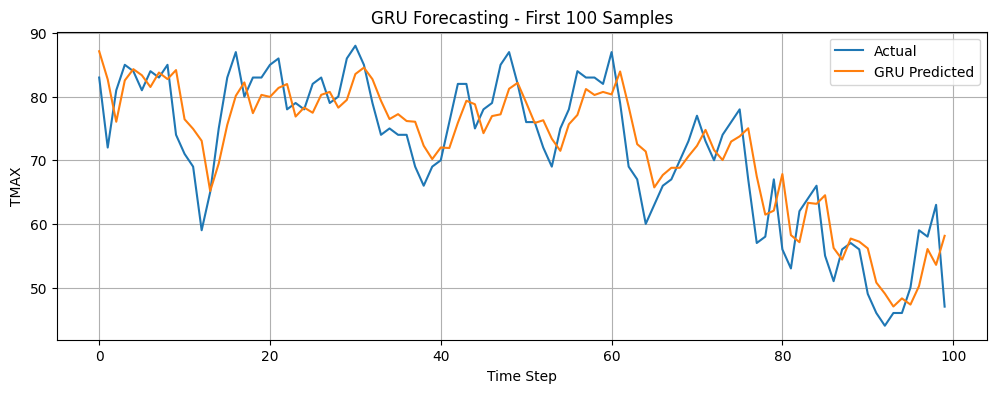

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test_unscaled[:100], label='Actual')
plt.plot(y_gru_pred_unscaled[:100], label='GRU Predicted')
plt.title('GRU Forecasting - First 100 Samples')
plt.xlabel('Time Step')
plt.ylabel('TMAX')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4962 - val_loss: 0.0232
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0331 - val_loss: 0.0172
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0240 - val_loss: 0.0155
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0209 - val_loss: 0.0124
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0174 - val_loss: 0.0100
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0146 - val_loss: 0.0090
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - val_loss: 0.0074
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0130 - val_loss: 0.0072
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - val_loss: 0.0063
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0107 - val_loss: 0.0061
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - val_loss: 0.0062
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0095 - val_l

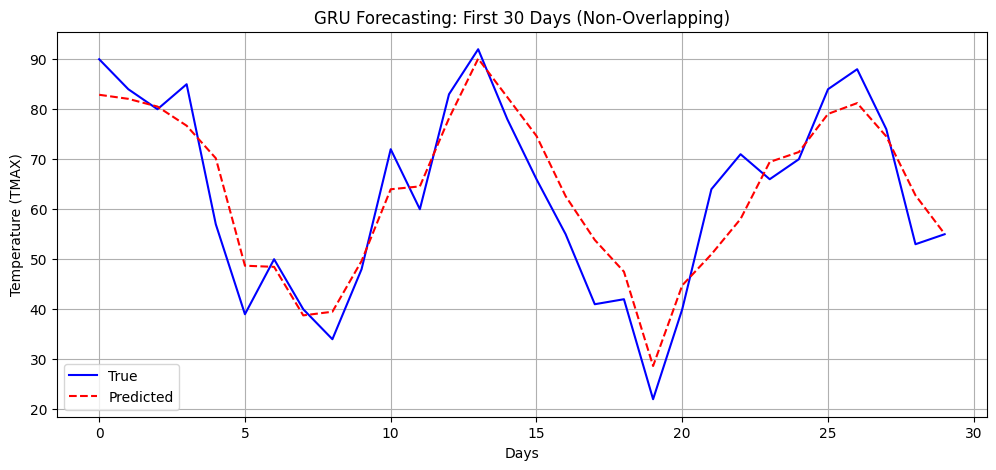

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Define GRU model
def build_gru(units, dropout, learning_rate):
    model = Sequential()
    model.add(GRU(units, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))
    return model

# Use best parameters (you can update these after tuning)
best_params = {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32}

# Build and train model
gru_model = build_gru(best_params['units'], best_params['dropout'], best_params['learning_rate'])

history = gru_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=best_params['batch_size'],
    validation_data=(X_val, y_val),
    verbose=1
)

# Predict on test set
test_pred = gru_model.predict(X_test)

# Inverse transform
test_pred_rescaled = scaler.inverse_transform(test_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results (optional, limited to 30 days if desired)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled[:30], label='True', color='blue')
plt.plot(test_pred_rescaled[:30], label='Predicted', color='red', linestyle='--')
plt.title('GRU Forecasting: First 30 Days (Non-Overlapping)')
plt.xlabel('Days')
plt.ylabel('Temperature (TMAX)')
plt.legend()
plt.grid(True)
plt.show()


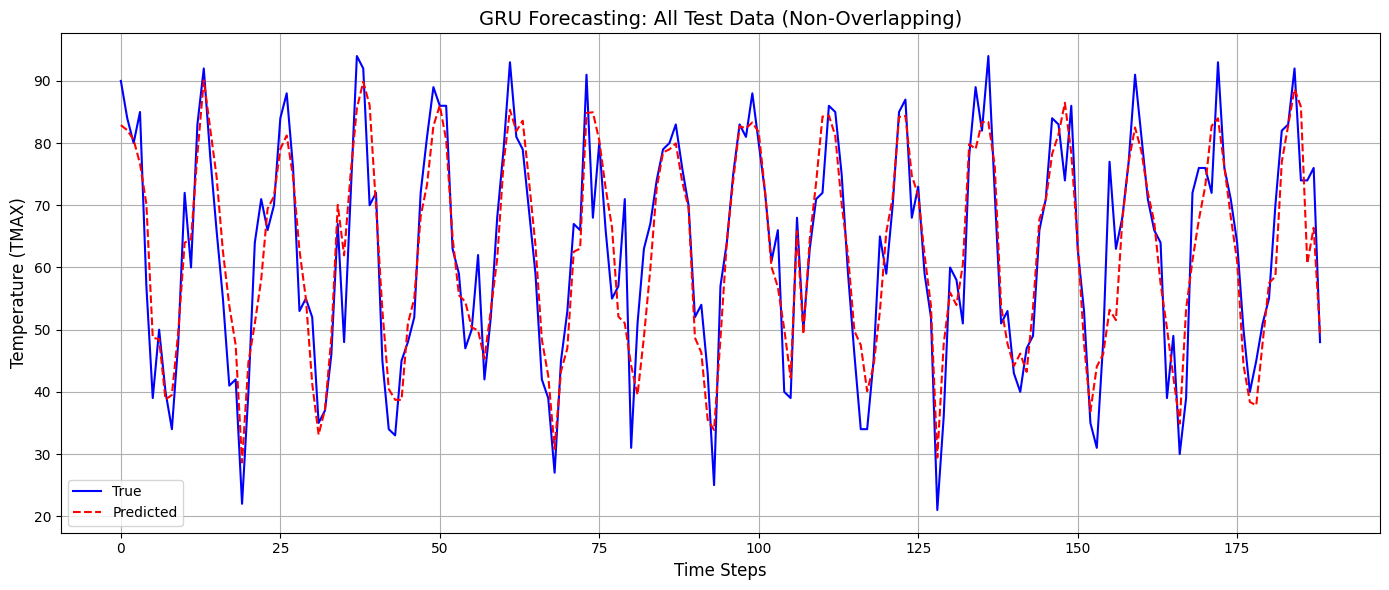

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='True', color='blue')
plt.plot(test_pred_rescaled, label='Predicted', color='red', linestyle='--')
plt.title('GRU Forecasting: All Test Data (Non-Overlapping)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Temperature (TMAX)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: evaluation metric

import numpy as np
# Calculate MSE, RMSE, MAE, and R-squared for the test set
mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, test_pred_rescaled)
r2 = r2_score(y_test_rescaled, test_pred_rescaled)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 48.6409
Root Mean Squared Error (RMSE): 6.9743
Mean Absolute Error (MAE): 5.4318
R-squared (R²): 0.8433


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import itertools
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'units': [32, 64],
    'dropout': [0.0, 0.2],
    'learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64],
    'epochs': [30]
}

# Generate combinations
grid = list(itertools.product(*param_grid.values()))

# Store results
gru_results = []

# Define the GRU model builder
def build_gru(units, dropout, learning_rate):
    model = Sequential([
        GRU(units, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

# Grid search loop
for values in grid:
    params = dict(zip(param_grid.keys(), values))
    print(f"Training with: {params}")

    model = build_gru(params['units'], params['dropout'], params['learning_rate'])

    history = model.fit(X_train, y_train,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        validation_data=(X_val, y_val),
                        verbose=0)

    val_pred = model.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

    gru_results.append({
        'params': params,
        'val_rmse': val_rmse,
        'final_val_loss': history.history['val_loss'][-1]
    })

# Create and sort results DataFrame
gru_results_df = pd.DataFrame(gru_results)
gru_results_df = gru_results_df.sort_values(by='val_rmse')

print(gru_results_df.head())


Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 32, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Training with: {'units': 32, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training with: {'units': 64, 'dropout': 0.0, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Training with: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.0005, 'batch_size': 64, 'epochs': 30}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
                                               params  val_rmse  \
0   {'units': 32, 'dropout': 0.0, 'learning_rate':...  0.070706   
12  {'units': 64, 'dropout': 0.2, 'learning_rate':...  0.070939   
8   {'units': 64, 'dropout': 0.0, 'learning_rate':...  0.071256   
5   {'units': 32, 'dropout': 0.2, 'learning_rate':...  0.071667   
2   {'units': 32, 'dropout': 0.0, 'learning_rate':...  0.072184   

    final_val_loss  
0         0.004999  
12        0.005032  
8         0.005077  
5         0.005136  
2         0.005211  


In [ ]:
# Extract and flatten the hyperparameter tuning results
results_expanded = pd.DataFrame([{
    'Units': res['params']['units'],
    'Dropout': res['params']['dropout'],
    'Learning Rate': res['params']['learning_rate'],
    'Batch Size': res['params']['batch_size'],
    'Epochs': res['params']['epochs'],
    'Val RMSE': res['val_rmse'],
    'Final Val Loss': res['final_val_loss']
} for res in gru_results])

# Sort by Val RMSE and display all results
results_expanded = results_expanded.sort_values(by='Val RMSE', ascending=True).reset_index(drop=True)
print(results_expanded)


    Units  Dropout  Learning Rate  Batch Size  Epochs  Val RMSE  \
0      64      0.0         0.0010          32      30  0.070572   
1      64      0.2         0.0010          32      30  0.070608   
2      32      0.0         0.0010          64      30  0.070806   
3      32      0.2         0.0010          32      30  0.071166   
4      64      0.0         0.0005          32      30  0.071975   
5      64      0.2         0.0005          32      30  0.072287   
6      32      0.0         0.0010          32      30  0.072693   
7      32      0.0         0.0005          64      30  0.072734   
8      64      0.0         0.0010          64      30  0.073061   
9      32      0.2         0.0005          32      30  0.073467   
10     32      0.0         0.0005          32      30  0.073877   
11     64      0.0         0.0005          64      30  0.073895   
12     64      0.2         0.0010          64      30  0.073942   
13     32      0.2         0.0005          64      30  0.07427

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


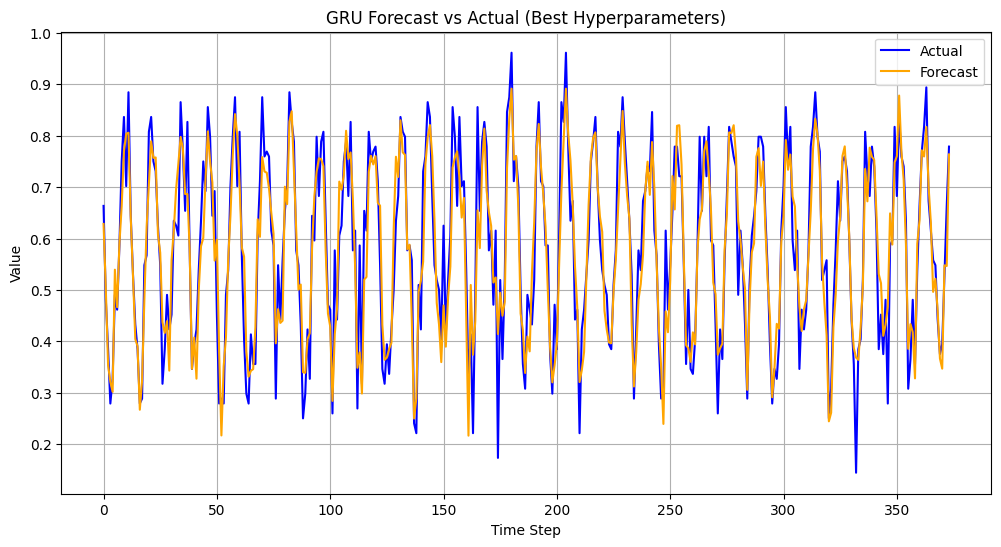

In [ ]:
import matplotlib.pyplot as plt

# Find the best hyperparameters (lowest Val RMSE)
best_params = results_expanded.iloc[0]

# Rebuild and train the model using the best parameters
best_model = build_gru(
    units=int(best_params['Units']),
    dropout=float(best_params['Dropout']),
    learning_rate=float(best_params['Learning Rate'])
)

# Fit on training data
history = best_model.fit(X_train, y_train,
                         epochs=int(best_params['Epochs']),
                         batch_size=int(best_params['Batch Size']),
                         verbose=0)

# Predict on validation set (or test set)
forecast = best_model.predict(X_val)

# Plot the ground truth vs forecast
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='Actual', color='blue')
plt.plot(forecast, label='Forecast', color='orange')
plt.title('GRU Forecast vs Actual (Best Hyperparameters)')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: print best parametrs

best_params


{'units': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32}

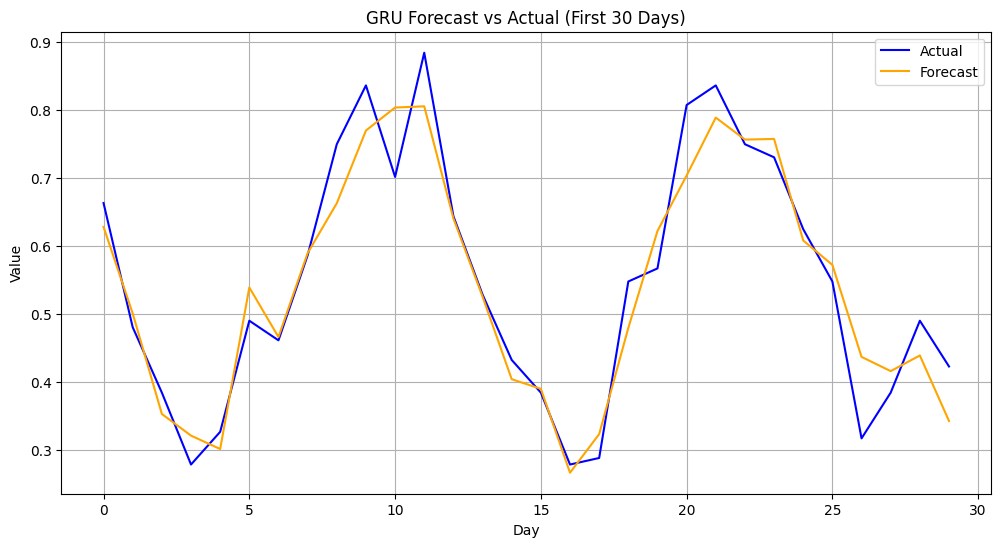

In [ ]:
# Select only the first 30 days (assuming 1 time step = 1 day)
forecast_30 = forecast[:30]
y_val_30 = y_val[:30]

# Plot the first 30 days
plt.figure(figsize=(12, 6))
plt.plot(y_val_30, label='Actual', color='blue')
plt.plot(forecast_30, label='Forecast', color='orange')
plt.title('GRU Forecast vs Actual (First 30 Days)')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: evalution metrics

import numpy as np
# Assuming test_pred_rescaled and y_test_rescaled are already defined

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_rescaled, test_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, test_pred_rescaled)
r2 = r2_score(y_test_rescaled, test_pred_rescaled)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 44.8287
Root Mean Squared Error (RMSE): 6.6954
Mean Absolute Error (MAE): 5.2055
R-squared (R²): 0.8555
